In [194]:
import matplotlib.pyplot as plt
from scipy.stats import *
import numpy as np

# Organize all .txt files into one

N = 1001

freq = (0.5, 1.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0)
V = (0.2,0.4,0.6,0.8)

V_collect = np.zeros((N,len(freq))) # datapoints x frequencies

# for main datapoints of < 0.001uW laser
for v in range(len(V)):
    for i, f in enumerate(freq):
        data = np.loadtxt(f'{V[v]}V-data/{f}Hz-data')   # include extension if needed
        V_collect[:,i] = data
    
    np.savetxt(f'{V[v]}V.txt', V_collect)
    print(f'Organized {V[v]} files...')

Organized 0.2 files...
Organized 0.4 files...
Organized 0.6 files...
Organized 0.8 files...


In [195]:
# For background noise

freq_n = (0.5, 1.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 500.0, 1000.0)

N = 900
V_collect = np.zeros((N,len(freq_n))) # datapoints x frequencies

for i, f in enumerate(freq_n):
        data = np.loadtxt(f'noise-data/{f}Hz-data')[:N]
        #print(data.shape)
        V_collect[:,i] = data    

np.savetxt(f'noise', V_collect)
print(f'Organized noise files...')

Organized noise files...


In [196]:
# for additional files of different beam powers

N = 100

freq_vlt = (1.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 500.0, 1000.0)
files = ('0.57uW','0.157uW')

V_collect = np.zeros((N,len(freq_vlt))) # datapoints x frequencies

# for main datapoints of < 0.001uW laser
for v in range(len(files)):
    for i, f in enumerate(freq_vlt):
        data = np.loadtxt(f'{files[v]}/{f}Hz-data')[:N]
        V_collect[:,i] = data
    
    np.savetxt(f'{files[v]}.txt', V_collect)
    print(f'Organized {files[v]} files...')

Organized 0.57uW files...
Organized 0.157uW files...


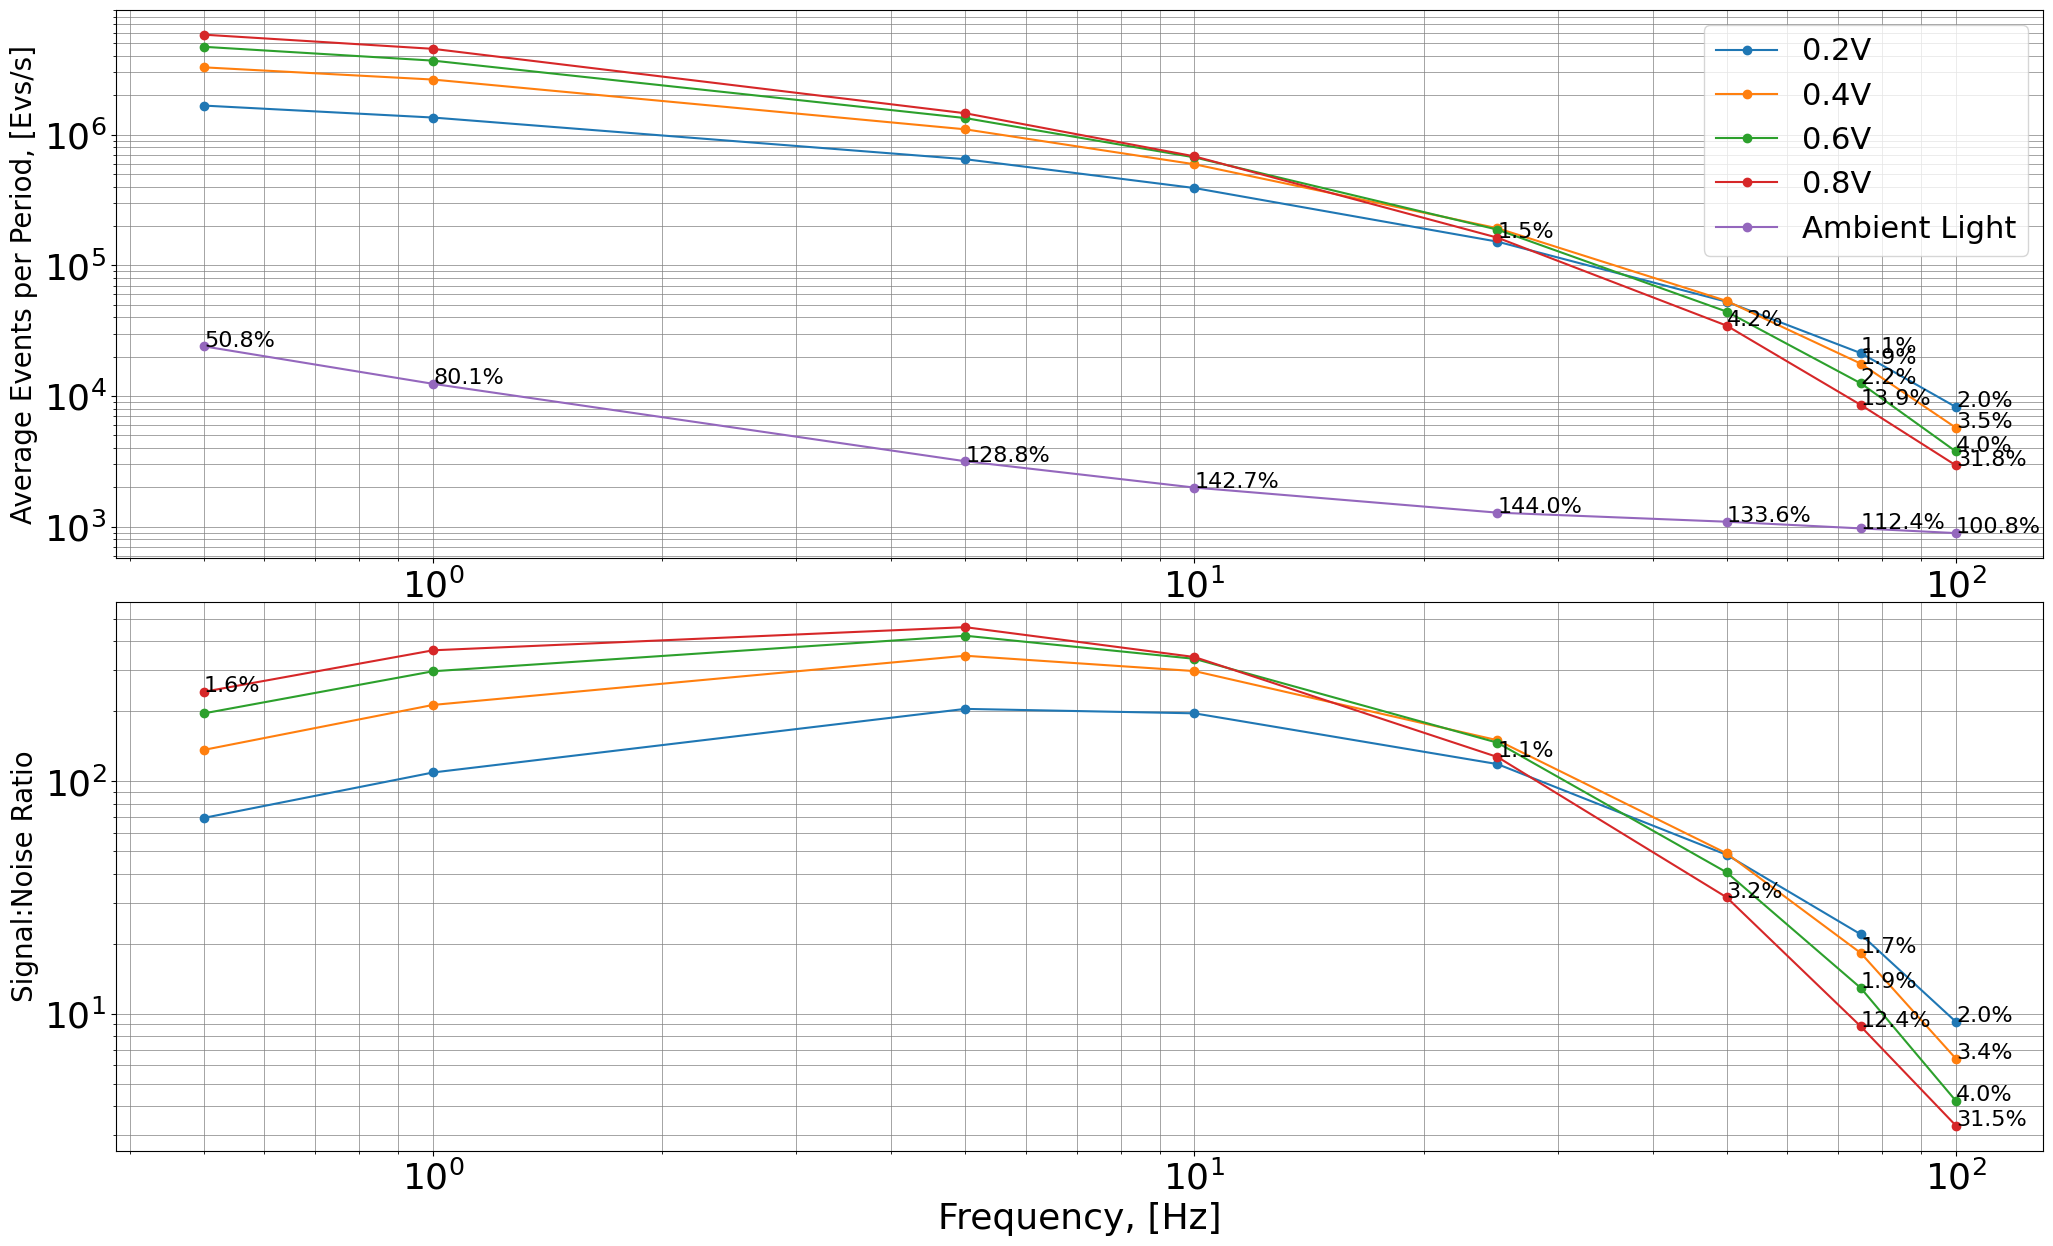

In [197]:
# for the voltages
fig,(ax1,ax2) = plt.subplots(2,1,figsize = (20,12))
fig.tight_layout()

V = (0.2,0.4,0.6,0.8)
sigma = np.zeros((len(V),len(freq)))  
means = np.copy(sigma)

noise = np.loadtxt('noise.txt')
mean_n = noise.mean(axis=0)[:8]
std_n = noise.std(axis=0)[:8]

for i, v in enumerate(V):
    data = np.loadtxt(f'{v}V.txt')                                                  # extract the data
    mean = data.mean(axis=0)
    std = data.std(axis=0)
    ax1.loglog(freq,mean, marker = 'o', label = f'{v}V')            # data.mean(axis=0) = mean along the rows, gives mean per coloumn. Should have len(V) datapoints
    means[i,:] = mean
    sigma[i,:] = std

    # annotate each datapoint
    for j in range(data.shape[1]):
        if std[j]/mean[j] > 0.01:
            ax1.text(freq[j] ,mean[j], f'{100*std[j]/mean[j]:.1f}%', fontsize = 16)

# plot the noise floor

ax1.loglog(freq,mean_n, marker = 'o', label = f'Ambient Light')     # noise line
for j in range(len(mean_n)):
        if std_n[j]/mean_n[j] > 0.01:
            ax1.text(freq[j] ,mean_n[j], f'{100*std_n[j]/mean_n[j]:.1f}%', fontsize = 16)

# formatting
ax1.legend(fontsize = 22)
ax1.grid(True, which="both", ls="-", lw=0.5, color='gray')
ax1.set_ylabel('Average Events per Period, [Evs/s]', fontsize = 20)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 26)

#%% [SECOND PLOT FOR SNR]

for i, v in enumerate(V):
    data = np.loadtxt(f'{v}V.txt')                                                  # extract the data
    data = data[:,:8]
    mean = data.mean(axis=0)
    std = data.std(axis=0)
    ax2.loglog(freq,mean/mean_n, marker = 'o', label = f'{v}V')            # these datasets do not have 500Hz, 1000Hz
    means[i,:] = mean
    sigma[i,:] = std
    
    # annotate each datapoint
    for j in range(data.shape[1]):
        if (std[j]/std_n[j])/(mean[j]/mean_n[j]) > 0.01:        # check if the SNR standard deviation exceeds 1%, if so, label
            ax2.text(freq[j], mean[j]/mean_n[j], f'{100*(std[j]/std_n[j])/(mean[j]/mean_n[j]):.1f}%', fontsize = 16)

# # noise floor? 
# ax2.loglog(freq,mean_n/mean_n, marker = 'o', label = f'Ambient Light')     # noise line
# for j in range(len(mean_n)):
#         if (std_n[j]/std_n[j])/(mean_n[j]/mean_n[j]) > 0.01:        
#             ax2.text(freq[j], mean_n[j]/mean_n[j], f'{100*(std_n[j]/std_n[j])/(mean_n[j]/mean_n[j]):.1f}%', fontsize = 16)

ax2.grid(True, which="both", ls="-", lw=0.5, color='gray')
ax2.set_xlabel('Frequency, [Hz]', fontsize = 26)
ax2.set_ylabel('Signal:Noise Ratio', fontsize = 20)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 26)
fig.savefig('Events per Period')

Obtained 0.57uW.txt file of size (100, 9)...
Obtained 0.157uW.txt file of size (100, 9)...
Obtained 0.57uW.txt file of size (100, 9)...
(9,)
Obtained 0.157uW.txt file of size (100, 9)...
(9,)


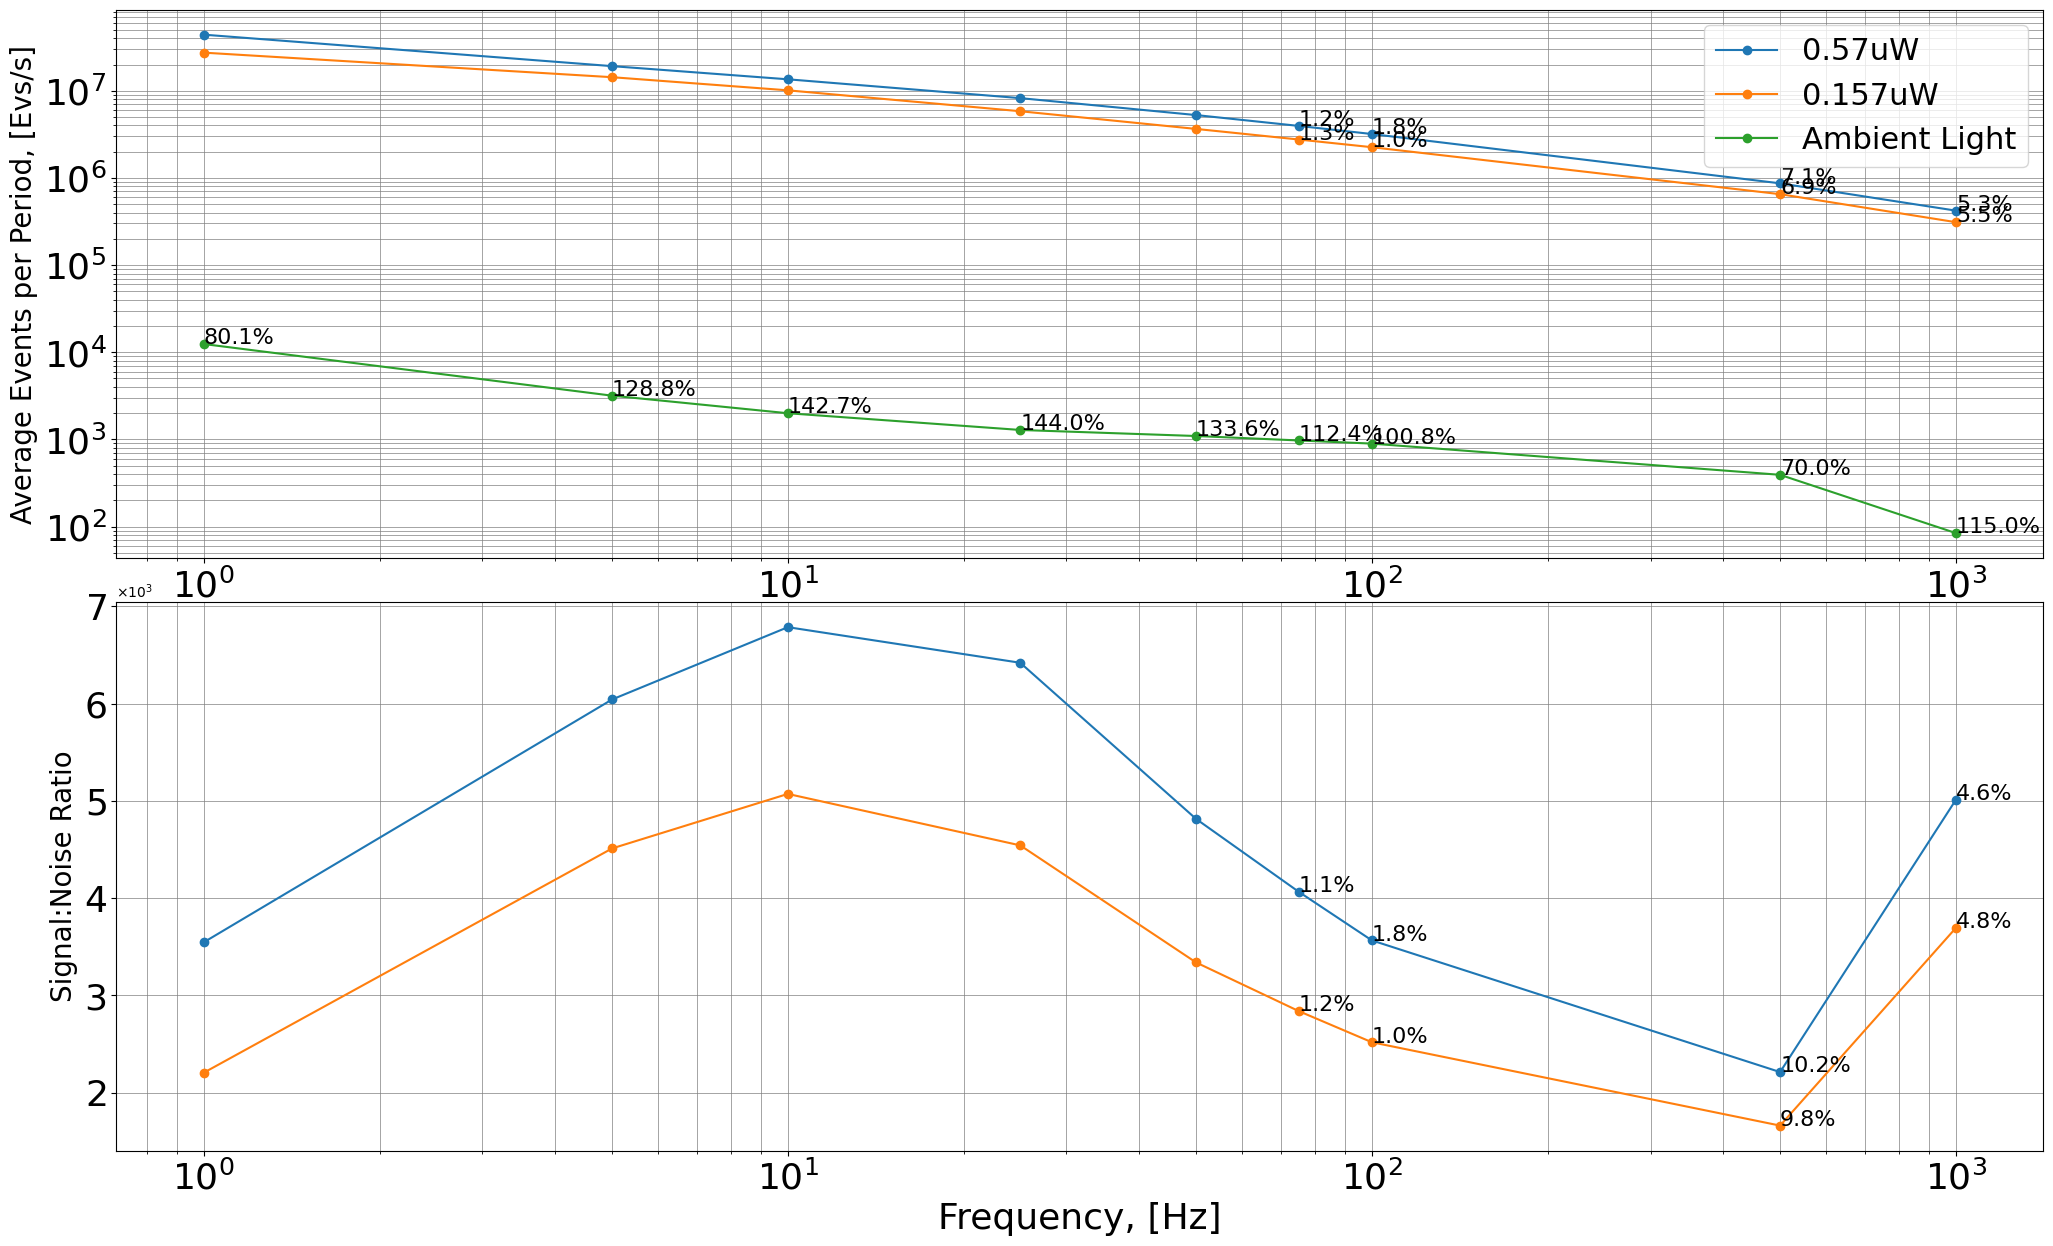

In [198]:
# obtain the new laser power graphs

fig, (ax1,ax2) = plt.subplots(2,1, figsize = (20,12))
fig.tight_layout()

noise = np.loadtxt('noise.txt')
mean_n = noise.mean(axis=0)[1:]
std_n = noise.std(axis=0)[1:]

for i, v in enumerate(files):
    data = np.loadtxt(f'{v}.txt')                                                  # extract the data
    print(f'Obtained {v}.txt file of size {data.shape}...')
    mean = data.mean(axis=0)
    std = data.std(axis=0)
    ax1.loglog(freq_vlt,mean, marker = 'o', label = f'{v}')            # these datasets do not have 500Hz, 1000Hz
    
    # annotate each datapoint
    for j in range(data.shape[1]):
        if (std[j])/(mean[j]) > 0.01:        
            ax1.text(freq_vlt[j], mean[j], f'{100*(std[j])/(mean[j]):.1f}%', fontsize = 16)

# plot noise & averaged standard deviations
ax1.loglog(freq_vlt,mean_n, marker = 'o', label = f'Ambient Light')     # noise line
for j in range(len(mean_n)):
        if std_n[j]/mean_n[j] > 0.01:
            ax1.text(freq_vlt[j] ,mean_n[j], f'{100*std_n[j]/mean_n[j]:.1f}%', fontsize = 16)

# formatting
ax1.legend(fontsize = 22)
ax1.grid(True, which="both", ls="-", lw=0.5, color='gray')
ax1.set_ylabel('Average Events per Period, [Evs/s]', fontsize = 20)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 26)

# [SECOND PLOT]

for i, v in enumerate(files):
    data = np.loadtxt(f'{v}.txt')                                                  # extract the data
    print(f'Obtained {v}.txt file of size {data.shape}...')
    mean = data.mean(axis=0)
    std = data.std(axis=0)
    print(mean_n.shape)
    ax2.semilogx(freq_vlt,mean/mean_n, marker = 'o', label = f'{v}')            # these datasets do not have 500Hz, 1000Hz

    # annotate each datapoint
    for j in range(data.shape[1]):
        if (std[j]/std_n[j])/(mean[j]/mean_n[j]) > 0.01:        # check if the SNR standard deviation exceeds 1%, if so, label
            ax2.text(freq_vlt[j], mean[j]/mean_n[j], f'{100*(std[j]/std_n[j])/(mean[j]/mean_n[j]):.1f}%', fontsize = 16)

# # noise floor?
# ax2.loglog(freq_vlt,mean_n/mean_n, marker = 'o', label = f'Ambient Light')     # noise line
# for j in range(len(mean_n)):
#         if (std_n[j]/std_n[j])/(mean_n[j]/mean_n[j]) > 0.01:        
#             ax2.text(freq_vlt[j], mean_n[j]/mean_n[j], f'{100*(std_n[j]/std_n[j])/(mean_n[j]/mean_n[j]):.1f}%', fontsize = 16)

ax2.grid(True, which="both", ls="-", lw=0.5, color='gray')
ax2.set_xlabel('Frequency, [Hz]', fontsize = 26)
ax2.set_ylabel('Signal:Noise Ratio', fontsize = 20)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 26)
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)
fig.savefig('Different laser powers, SNR')